The meaning of the differential equation 

$$
\frac{\mathrm{d}V}{\mathrm{d}t} = \alpha(V-\beta)
$$
whose solution, by the way, is:
$$
V(t) = \beta + e^{\alpha t}
$$


is that there is an exponentially growing or decaying (if $\alpha < 0$) and growing (if $\alpha > 0$) from an initial condition $\beta-1$

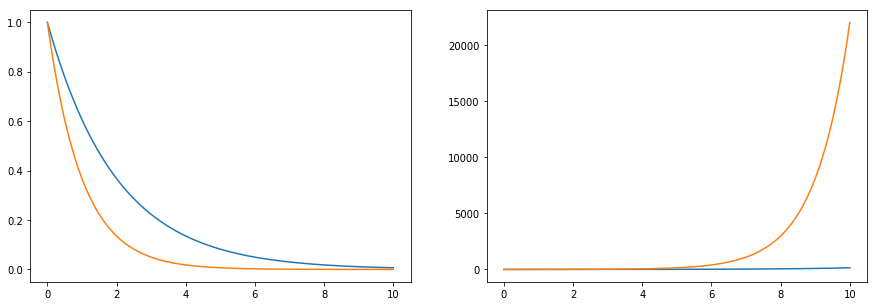

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 10, 1000);
alpha0 = -0.5;
alpha1 =  0.5;
init_c0 = 1
init_c1 = 1
beta0 = init_c0 - 1;
beta1 = init_c1 - 1;

plt.figure(figsize=(15,5))
plt.subplot(121)
V0 = beta0 + np.exp(alpha0*t);
V1 = beta0 + np.exp(alpha0*2*t);
plt.plot(t, V0, t, V1)

plt.subplot(122)
V0 = beta1 + np.exp(alpha1*t);
V1 = beta1 + np.exp(alpha1*2*t);
plt.plot(t, V0, t, V1)

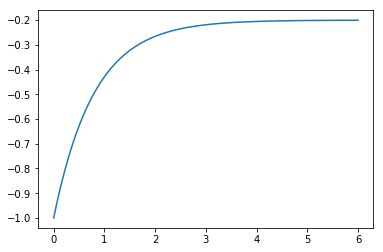

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nV = -0.2
C = 0.8
t = np.linspace(0,6,100)
tau = 0.8

n = nV - C*np.exp(-t/tau)

plt.plot(t,n)

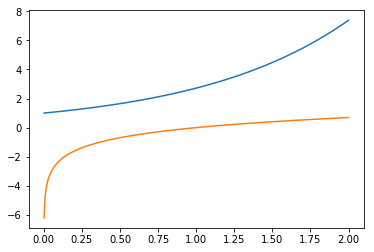

In [3]:
x = np.linspace(0,2,1000)
x = x[1:]
y0 = np.exp(x)
y1 = np.log(x)
plt.plot(x,y0,x,y1)


In [4]:
V = 0.05
a = (0.01*(V + 55))/(1-np.exp(-0.1*(V + 55)))
b = 0.125*np.exp(-0.0125*(V + 65))

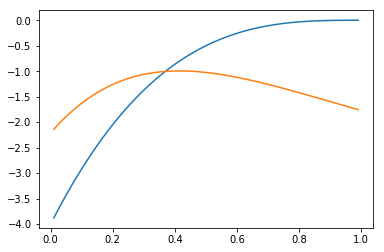

In [5]:
n = np.linspace(0.01, 0.99, 100)
q1 = -4*(1-n)**3
q2 = b*4*n*(1-3)**3 - 4*a*(1-n)**4

plt.plot(n, q1, n, q2)

Text(0.5,1,'Figure 5.14')

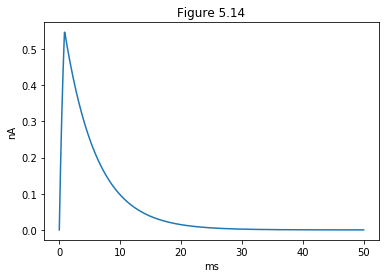

In [6]:
alpha = 0.93 # 1/ms
beta = 0.19  # 1/ms
T = 0.9      # ms
Te = 50 # duration of simulation, ms
Ps0 = 0 # initial probalibity
t = np.linspace(0, Te, 1000)
Ps = np.zeros_like(t)
for n in range(len(t)):
    if t[n] <= T:
        Ps[n] = 1 + (Ps0 - 1) * np.exp(-alpha*t[n]) # Eq. 5.28
        PsT = Ps[n] 
    else:
        Ps[n] = PsT * np.exp(-beta*(t[n]-T))        # Eq. 5.29
plt.plot(t, Ps)
plt.xlabel('ms')
plt.ylabel('nA')
plt.title('Figure 5.14')

Let's solve it numerically (Eq. 5.27):
$$
\boxed{\frac{dP_s}{dt} = \alpha_s (1 - P_s) - \beta P_s}
$$

let's multiply both sides by $dt$, set $dt$ to a small value, set $P_s$ to some initial value (say, 0):

$$
dP_s = (\alpha_s (1 - P_s) - \beta P_s)dt
$$

Text(0.5,1,'Figure 5.14')

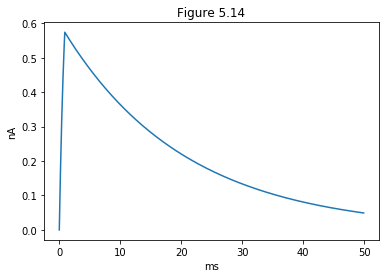

In [25]:
def get_next_Ps(decay, P_s, alpha, beta, dt):
    if decay==0:
        dP_s = (alpha*(1 - P_s) - beta*P_s)*dt
    else:
        dP_s = -beta*P_s*dt
    return P_s + dP_s

P_s0 = 0 # initial probalibity
alpha = 0.93 # 1/ms
beta = 0.19  # 1/ms
T = 0.9      # ms
Te = 50 # duration of simulation, ms
dt = 0.1
t = np.arange(0, Te, dt)
P_s = np.zeros_like(t)


# ravel, zip, *, **
P_s[0] = P_s0
for i in range(1, len(t)):
    decay=0 if t[i]<=T else 1
    P_s[i] = get_next_Ps(decay, P_s[i-1], alpha, beta, dt)
plt.plot(t, P_s)
plt.xlabel('ms')
plt.ylabel('nA')
plt.title('Figure 5.14')

In [477]:
class Neuron():
    def __init__(self, V0=-60, Ie=0.20, P_s0=0):
        # neuron's electric constants:
        self.Ie = Ie # external current
        self.Cm = 0.05 # membrane capacitance

        """ currents carried across the membrane by ion pumps that maintain the 
        concentration gradients.By convention, the membrane current is defined 
        as positive when positive ions leave the neuron and negative when positive 
        ions enter the neuron."""
        
        self.Ena = 55  # equilibrium potential for sodium (see Dayan, Abbott, pp. 169-179)
        self.Ek = -72  # equilibrium potential for potassium (potassium pumps push K+ ions into the 
                       # neuron (negative current) and Na+ ions out of the neuron (positive current).
        self.El = -49  # equilibrium potential for leakage
        self.Es = 0  # equilibrium potential for the synapse
        
        # maximum conductance ofchannels of k-th type (depends on a conductance of one 
        # opened channel and on a number of channels in the membrane)
        self.gNabar = 1.2
        self.gKbar = 0.36
        self.glbar = 0.003
        self.gSbar = 0.35 #0.05*0.003

        # Intial conditions
        self.V = V0 # intial membrane voltage

        # (alphas) probabilities of the domains' (n,m,h) transition to the open state:
        # see Dayan & Abbott, pp. 181-182
        self.an = 0.01*(self.V+55)/(1-np.exp(-0.1*(self.V+55)))
        self.am = 0.1*(self.V+40)/(1-np.exp(-0.1*(self.V+40)))
        self.ah = 0.07*np.exp(-0.05*(self.V+65))

        # (betas) probabilities of the domains' (n,m,h) transition to the closed state:
        # see Dayan & Abbott, pp. 181-182
        self.bn = 0.125*np.exp(-0.0125*(self.V+65))
        self.bm = 4*np.exp(-0.0556*(self.V+65))
        self.bh = 1/(1+np.exp(-0.1*(self.V+35)))

        # intial equilibrium probability of the opened state:
        self.n = self.an/(self.an+self.bn) # the probability of a subunit of a potassium channel being open (there're four sub-units)
        self.m = self.am/(self.am+self.bm) # the 'swinging' gate on the sodium channel (3 sub-units)
        self.h = self.ah/(self.ah+self.bh) # the 'ball' plug on the sodium channel (1 sub-unit)
        
        # initialize the axon's signalaling (what neurotransmitter this neuron can release):
        self.P_s = P_s0 # initial probalibity
        self.alpha = 0.93 # 1/ms
        self.beta = 0.19  # 1/ms
        self.outAP = 0
        self.inAP = 0
        
    def update_Ps(self, dt):
        if self.inAP==1:
            dP_s = (self.alpha*(1 - self.P_s) - self.beta*self.P_s)*dt
        else:
            dP_s = -self.beta*self.P_s*dt
        self.P_s += dP_s
        return self.P_s

    def step(self, dt):
        """
        MAKE ONE TIME STEP TO UPDATE THE NEURON'S PARAMETERS
        """
        self.update_Ps(dt)
        
        self.dm = dt*(self.am*(1-self.m)-self.bm*self.m);
        self.dn = dt*(self.an*(1-self.n)-self.bn*self.n);
        self.dh = dt*(self.ah*(1-self.h)-self.bh*self.h);

        self.m = self.m + self.dm;
        self.n = self.n + self.dn;
        self.h = self.h + self.dh;

        # Hodgkin-Huxley model: dV/dt is membrane current.
        # We multiply the ODE by dt/Cm to solve numerically: 
        dV = (-self.gKbar  *self.n**4 *(self.V-self.Ek)
              -self.gSbar  *self.P_s  *(self.V-self.Es)
              -self.gNabar *self.m**3 *CN.h*(self.V-self.Ena)
              -self.glbar  *(self.V-self.El) + self.Ie)/self.Cm*dt

        self.V = self.V + dV

        self.an = 0.01*(self.V+55)/(1-np.exp(-(self.V+55)/10))
        self.am = 0.1*(self.V+40)/(1-np.exp(-(self.V+40)/10))
        self.ah = 0.07*np.exp(-0.05*(self.V+65))

        self.bn = 0.125*np.exp(-(self.V+60)/80)
        self.bm = 4*np.exp(-0.0556*(self.V+60))
        self.bh = 1/(1+np.exp(-0.1*(self.V+30)))

        # if the action potential is fired, we set set the PSAP
        # flag of the postsynaptic neuron to True
        self.outAP = 1 if self.V > 0 else 0
        
        return self.V

In [478]:
# create a list of neuron objects:
N = 2
neurons = []
random_topology = 1

# Define network topology:
np.random.seed(10)
route0 = np.zeros((N,N), dtype='int')
route1 = np.random.randint(2, size=(N,N))
route = route0 if random_topology==0 else route1

# Change some default initialization parameters:
Ie = np.random.choice([0.15, 0.15, 0.15])
V0 = np.round(np.linspace(-65, -55, N))
for i in range(N):
    neurons.append(Neuron(V0=V0[i], Ie=Ie))
print([neurons[i].Ie for i in range(N)])
print([neurons[i].V for i in range(N)])

[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
[-65.0, -64.0, -64.0, -63.0, -63.0, -62.0, -62.0, -61.0, -61.0, -60.0, -60.0, -59.0, -59.0, -58.0, -58.0, -57.0, -57.0, -56.0, -56.0, -55.0]


/Users/RomanKoshkin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


/Users/RomanKoshkin/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


neuron 0: 	initial_state:  -59.84075563363185 	final_state: -67.73215346369628
neuron 1: 	initial_state:  -59.90933498285825 	final_state: -67.75619853261992


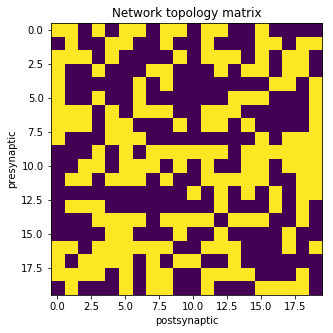

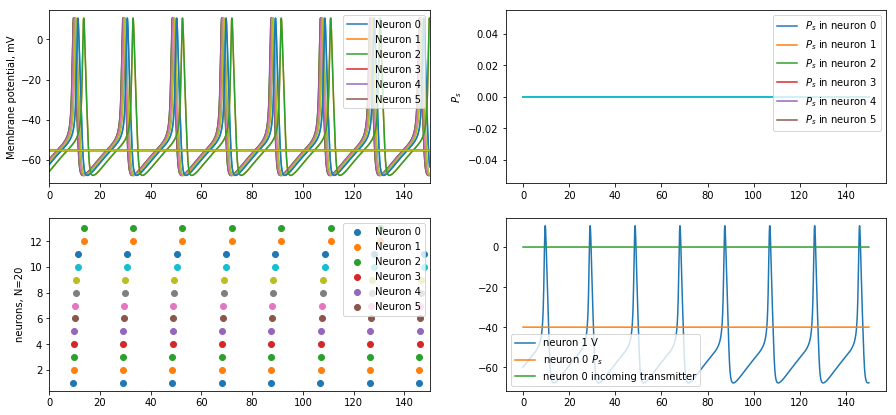

In [483]:
# Simulate the neurons for a specified time. You can re-run the simulation (re-run this cell)
# in which case the simulation will resume from the final state in the previous run. 

T = 150 # length of simulation, ms
dt = 0.01 # time step in milliseconds

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(route)
plt.ylabel('presynaptic')
plt.xlabel('postsynaptic')
plt.title('Network topology matrix')

t = np.arange(0, T, step=dt)
VV = np.zeros((len(neurons), len(t)))
SS = np.zeros((len(neurons), len(t)))
inAP = np.zeros((len(neurons), len(t)))
for tt in range(len(t)):
    for n in range(len(neurons)):
        CN = neurons[n]
        VV[n,tt] = CN.step(dt)
        SS[n,tt] = CN.P_s
        inAP[n,tt] = CN.inAP
    # execute signaling:
    for source in range(len(neurons)):
        targets = np.where(route[source,:]==1)[0].tolist()
        for target in targets:
            neurons[target].inAP = neurons[source].outAP


plt.figure(figsize=(15,7))
for i in range(len(neurons)):
    plt.subplot(221)
    plt.plot(t, VV[i,:])
    plt.ylabel('Membrane potential, mV')
    plt.xlim(0,T)
plt.legend (['Neuron ' + str(i) for i in range(np.min([N,6]))])
for i in range(len(neurons)):    
    plt.subplot(222)
    plt.plot(t, SS[i,:])
    plt.plot(t, inAP[i,:])
    plt.ylabel('$P_s$')
plt.legend(['$P_s$ in neuron ' + str(i) for i in range(np.min([N,6]))])
print('neuron 0:', '\tinitial_state: ', VV[0,0], '\tfinal_state:', VV[0,-1])
print('neuron 1:', '\tinitial_state: ', VV[1,0], '\tfinal_state:', VV[1,-1])

plt.subplot(224)
plt.plot(t, VV[1,:], t, SS[0,:]*7-40, t, inAP[0,:])
plt.legend(['neuron 1 V','neuron 0 $P_s$', 'neuron 0 incoming transmitter'])

from scipy.signal import find_peaks
plt.subplot(223)
for i in range(N):
    peaks, heights = find_peaks(VV[i,:], prominence=10)
    plt.scatter(t[peaks], np.ones_like(peaks)*(i+1))
    plt.xlim(0,T)
plt.ylabel('neurons, N=' + str(N))
plt.legend (['Neuron ' + str(i) for i in range(np.min([N,6]))])

neuron 0: 	initial_state:  -61.973451835954975 	final_state: -66.39393987935603
neuron 1: 	initial_state:  -51.332824733763914 	final_state: -53.06439405826756


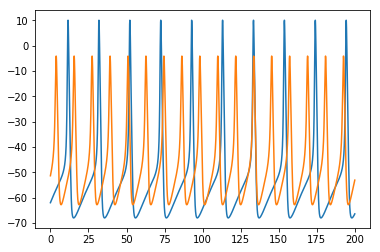

In [41]:
# Simulate the neurons for a specified time. You can re-run the simulation (re-run this cell)
# in which case the simulation will resume from the final state in the previous run. 

T = 200 # length of simulation, ms
dt = 0.01 # time step in milliseconds

t = np.arange(0, T, step=dt)
VV = np.zeros((len(neurons), len(t)))
for tt in range(len(t)):
    for n in range(len(neurons)):
        CN = neurons[n]
        VV[n,tt] = CN.step(dt)
for i in range(len(neurons)):
    plt.plot(t, VV[i,:])
print('neuron 0:', '\tinitial_state: ', VV[0,0], '\tfinal_state:', VV[0,-1])
print('neuron 1:', '\tinitial_state: ', VV[1,0], '\tfinal_state:', VV[1,-1])